
# Exploratory Data Analysis (EDA) - Visualization

This notebook performs visual EDA on the SpaceX dataset to uncover patterns and insights using Matplotlib and Seaborn.

## Objectives:
- Visualize relationships such as flight number vs. launch site.
- Understand payload distribution and orbit success rates.
- Explore trends over time.


## Import Required Libraries

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Load Cleaned Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load dataset
df = pd.read_csv("spacex_clean_data.csv")
df.head()



,flight_no.,date_and_time_(utc),"version,_booster[h]",launch_site,payload[i],payload_mass,orbit,customer,launch_outcome,booster_landing
0,195,"January 3, 2023 14:56[17]",F9 B5 B1060‑15,"Cape Canaveral, SLC‑40",Transporter-6 (115 payload smallsat rideshare),Unknown[j],SSO,Various,Success,Success (LZ‑1)
1,195,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...,Dedicated SmallSat Rideshare mission to Sun-sy...
2,196,"January 10, 2023 04:50[23]",F9 B5 B1076‑2,"Cape Canaveral, SLC‑40",OneWeb 16 (40 satellites),"6,000 kg (13,000 lb)",Polar LEO,OneWeb,Success,Success (LZ‑1)
3,196,"Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One...","Following the Russian invasion of Ukraine, One..."
4,FH 5,"January 15, 2023 22:56[29]",Falcon Heavy B5 B1070 (core),"Kennedy, LC‑39A",USSF-67 (CBAS-2 & LDPE-3A),"~3,750 kg (8,270 lb)",GEO,USSF,Success,No attempt


## Create Visualizations

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


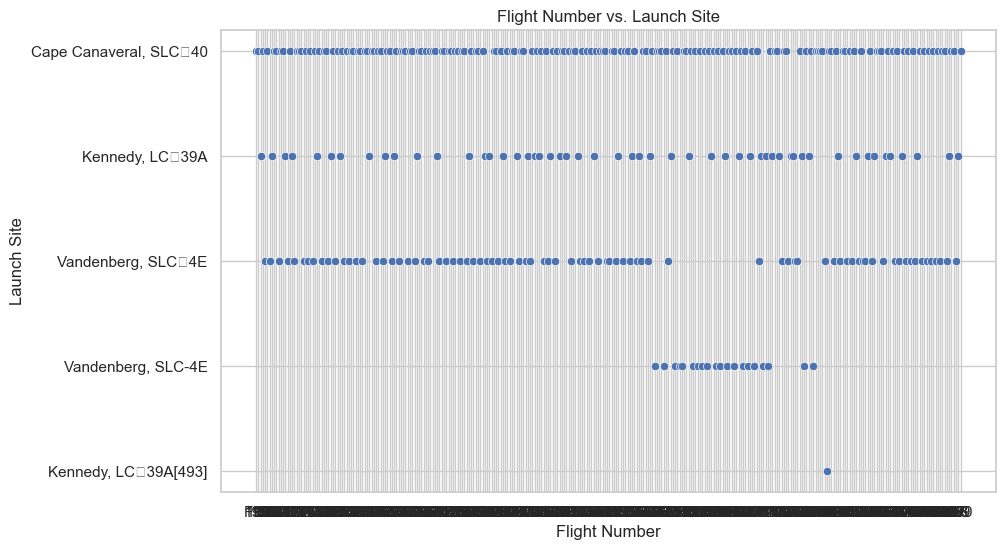

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


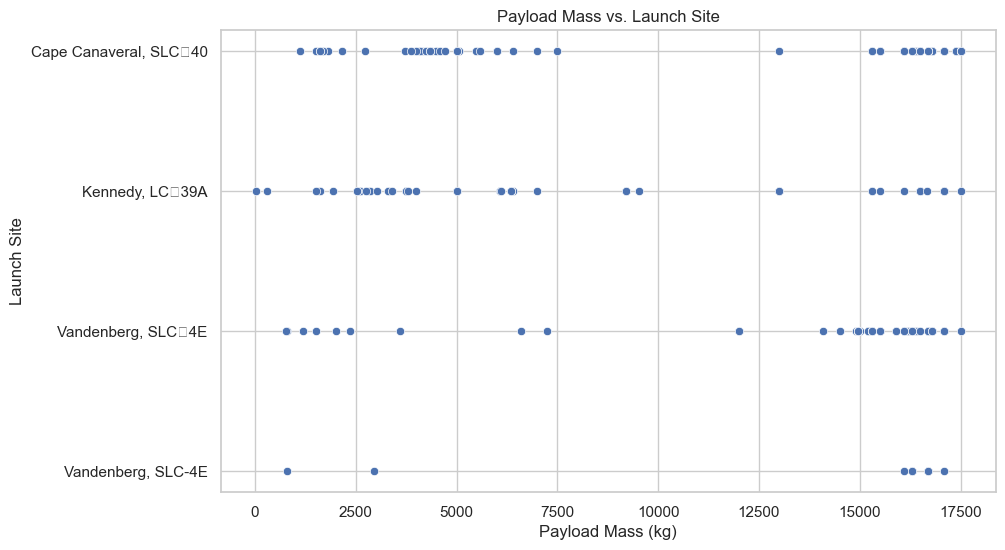

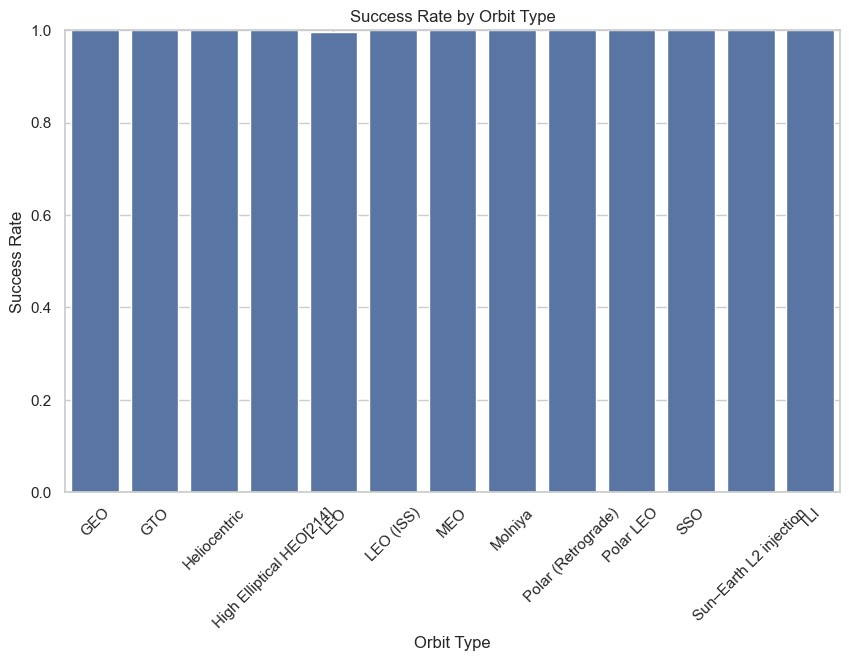

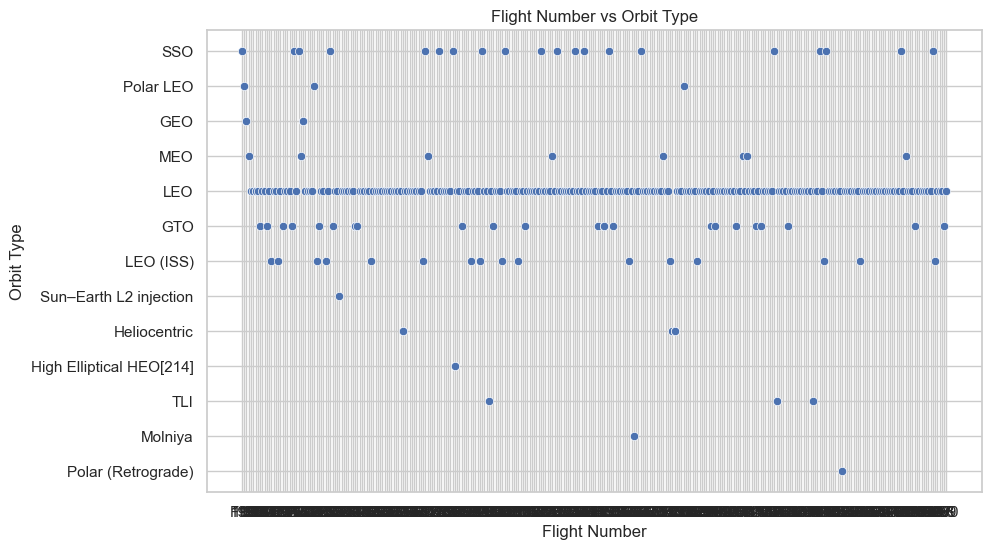

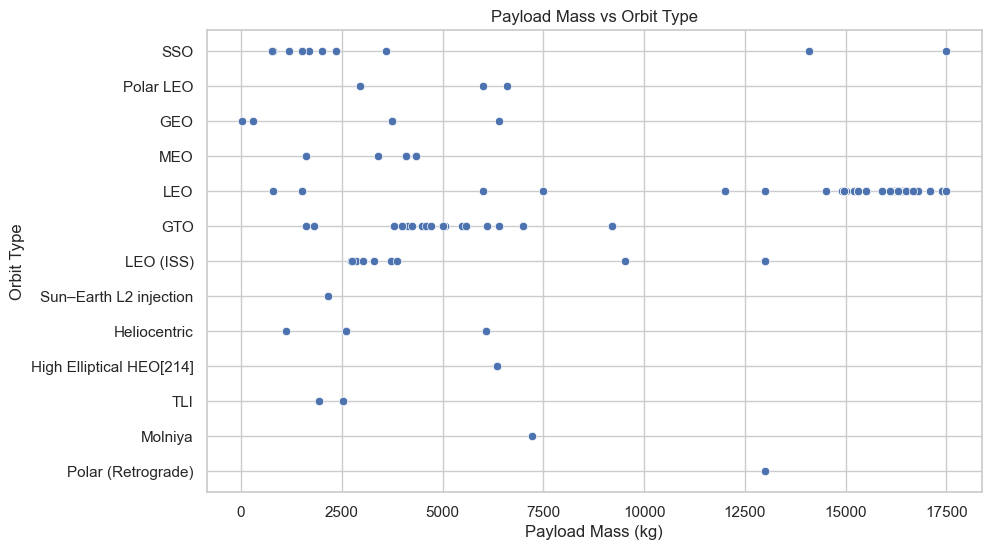

C:\Users\KIIT\AppData\Local\Temp\ipykernel_21356\3664841056.py:69: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date_and_time_(utc)'], errors='coerce')


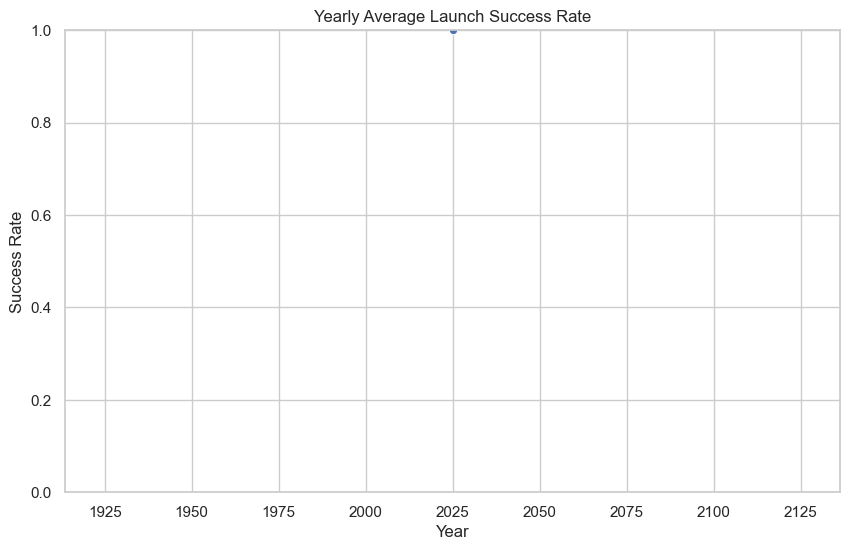

In [22]:

# Clean up relevant columns
df = df[['flight_no.', 'orbit', 'payload_mass', 'launch_outcome', 'date_and_time_(utc)', 'launch_site']].copy()
df = df.dropna()
df = df[df['launch_outcome'].isin(['Success', 'Failure'])]
df['orbit'] = df['orbit'].astype(str).str.strip()

# Convert launch outcome to binary success
df['success'] = df['launch_outcome'].map({'Success': 1, 'Failure': 0})

# Payload mass extraction function
def extract_kg(payload):
    match = re.search(r"([\d,]+)\s*kg", str(payload))
    if match:
        return float(match.group(1).replace(',', ''))
    return None

# Extract numeric payload mass
df['payload_mass_kg'] = df['payload_mass'].apply(extract_kg)

# -------------------- 1. Flight Number vs. Launch Site --------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='flight_no.', y='launch_site')
plt.title("Flight Number vs. Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.grid(True)
plt.show()

# -------------------- 2. Payload Mass vs. Launch Site --------------------
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='payload_mass_kg', y='launch_site')
plt.title("Payload Mass vs. Launch Site")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.grid(True)
plt.show()

# -------------------- 3. Success Rate by Orbit Type --------------------
plt.figure(figsize=(10, 6))
orbit_success = df.groupby('orbit')['success'].mean().reset_index()
sns.barplot(data=orbit_success, x='orbit', y='success')
plt.title("Success Rate by Orbit Type")
plt.xlabel("Orbit Type")
plt.ylabel("Success Rate")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# -------------------- 4. Flight Number vs Orbit Type --------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flight_no.', y='orbit')
plt.title("Flight Number vs Orbit Type")
plt.xlabel("Flight Number")
plt.ylabel("Orbit Type")
plt.grid(True)
plt.show()

# -------------------- 5. Payload Mass vs Orbit Type --------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='payload_mass_kg', y='orbit')
plt.title("Payload Mass vs Orbit Type")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.grid(True)
plt.show()

# -------------------- 6. Yearly Launch Success Trend --------------------
df['date'] = pd.to_datetime(df['date_and_time_(utc)'], errors='coerce')
df['year'] = df['date'].dt.year
yearly_success = df.groupby('year')['success'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_success, x='year', y='success', marker='o')
plt.title("Yearly Average Launch Success Rate")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()
